# Scikit-Learn
***

## Overview of scikit-learn python library
****

<h4>What is Scikit-Learn?</h4>
    <p>Scikit-Learn is a open source library, machine learning library in Python which features a variety of technology and algorithms,
    some of which will be demonstrated below.
    
It is considered the peak of Machine Learning, as it it is considering the easiest to understand and use and is well documented and with just some lines of code you can do so much, e.g. with just a few lines of code you can create a model that can predict outcomes just with the use other python technology and libraries.
    
Technology that many developers may be familiar with or is very common in Python includes Matplotlib, Pandas and NumPy.
    
Algorithms that are common in Scikit-Learn include Regression, Clustering, Model Learning and Classification.</p>

<h3> Algorithm #1</h3>

<h4>Handwritten digits recognition</h4>

In [48]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import joblib

from sklearn import svm
from sklearn import metrics
from sklearn.utils import shuffle

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/codeheroku/Introduction-to-Machine-Learning/master/Building%20a%20Digit%20Recognizer/csv/dataset6labels.csv")
df = df.sample(frac=1).reset_index(drop=True)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x = df.drop(['label'],axis=1)
y = df["label"]

x_train, y_train = x[0:130], y[0:130]
x_test, y_test = x[130:], y[130:]

In [51]:
model = svm.SVC(kernel="linear")
model.fit(x_train, y_train)

joblib.dump(model, "svm_4label_linear")

['svm_4label_linear']

In [52]:
predictions = model.predict(x_test)

metrics.accuracy_score(y_test, predictions)

0.8521739130434782

<h3> Algorithm #2</h3>

<h4>Decision Trees</h4>

<h3> Algorithm #3</h3>

<h4>Deep Belief Network</h4>

In [53]:
# Imports
import matplotlib.pyplot as plt 
import tensorflow as tf

In [54]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [55]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

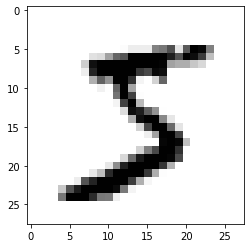

In [56]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()